In [1]:
from saf_sinasc.feature_engineering import (
    load_negative_and_positive_df, 
    drop_columns, 
    pre_process_enrich_columns, 
    ensure_dtypes, 
    feature_creation,
    preprocess_inputation,
    get_dummies
)

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df1 = load_negative_and_positive_df()

df2 = drop_columns(df1)
df2 = ensure_dtypes(df2)

# acho que eh aqui que vem a feature_creation
df = feature_creation(df2)

df = pre_process_enrich_columns(df)
df = preprocess_inputation(df)
df = get_dummies(df)

'positives_df.shape: (1262, 72)'

'neutral_df.shape: (6310, 72)'

'remove_columns: df columns: 72'

'remove_columns: columns to drop: 27'

'remove_columns: output columns: 46'

'feature_creation: df shape: (7572, 46)'

'feature_creation: df shape: (7572, 49)'

In [22]:
[i for i in df1.columns]

['ORIGEM',
 'CODCART',
 'NUMREGCART',
 'DTREGCART',
 'CODESTAB',
 'CODMUNNASC',
 'LOCNASC',
 'IDADEMAE',
 'ESTCIVMAE',
 'ESCMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'CODPAISRES',
 'GESTACAO',
 'GRAVIDEZ',
 'PARTO',
 'CONSULTAS',
 'DTNASC',
 'HORANASC',
 'SEXO',
 'APGAR1',
 'APGAR5',
 'RACACOR',
 'PESO',
 'IDANOMAL',
 'DTCADASTRO',
 'CODANOMAL',
 'NUMEROLOTE',
 'VERSAOSIST',
 'DTRECEBIM',
 'DIFDATA',
 'DTRECORIG',
 'NATURALMAE',
 'CODMUNNATU',
 'SERIESCMAE',
 'DTNASCMAE',
 'RACACORMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'DTULTMENST',
 'SEMAGESTAC',
 'TPMETESTIM',
 'CONSPRENAT',
 'MESPRENAT',
 'TPAPRESENT',
 'STTRABPART',
 'STCESPARTO',
 'TPROBSON',
 'STDNEPIDEM',
 'STDNNOVA',
 'ESTADO_DF',
 'ANO_DF',
 'ANO',
 'RACACORN',
 'ESCMAE2010',
 'DTRECORIGA',
 'CODUFNATU',
 'TPNASCASSI',
 'TPFUNCRESP',
 'TPDOCRESP',
 'DTDECLARAC',
 'ESCMAEAGR1',
 'PARIDADE',
 'KOTELCHUCK',
 'CODMUNCART',
 'RACACOR_RN',
 'ESTADO',
 'y']

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0, max_depth = 4, ccp_alpha = 0.001)
# clf = DecisionTreeClassifier(random_state=0)

y = df["y"]
X = df.drop(columns=["y"])

score = cross_val_score(clf, X, y, cv=20, scoring='accuracy').mean()
print(score)


# Anotações artesanais de comparativo de performance
# v1:
#     0.7832610880763916

0.7832610880763916


In [3]:
score = cross_val_score(clf, X, y, cv=20, scoring='f1').mean()
print(score)

# Anotações artesanais de comparativo de performance
# v1: 
#     0.4450354740271167

0.4450354740271167


In [4]:
[i for i in X.columns]

['CODESTAB',
 'CODMUNNASC',
 'IDADEMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'APGAR1',
 'APGAR5',
 'PESO',
 'CODMUNNATU',
 'SERIESCMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'SEMAGESTAC',
 'CONSPRENAT',
 'MESPRENAT',
 'ANO',
 'ESCMAE2010',
 'CODUFNATU',
 'CODMUNCART',
 'equal_CODMUNRES_and_CODMUNNASC',
 'equal_CODMUNRES_and_CODMUNNATU',
 'equal_CODMUNNASC_and_CODMUNNATU',
 'LOCNASC_Domicílio',
 'LOCNASC_Hospital',
 'LOCNASC_Ignorado',
 'LOCNASC_Outro Estab. Saúde',
 'LOCNASC_Outros',
 'ESTCIVMAE_Casado',
 'ESTCIVMAE_Ignorado',
 'ESTCIVMAE_Separado Judic./Divorciado',
 'ESTCIVMAE_Solteiro',
 'ESTCIVMAE_União consensual',
 'ESTCIVMAE_Viúvo',
 'ESCMAE_1 a 3 anos',
 'ESCMAE_12 e mais',
 'ESCMAE_4 a 7 anos',
 'ESCMAE_8 a 11 anos',
 'ESCMAE_Ignorado',
 'ESCMAE_Nenhuma',
 'ESCMAEAGR1_Ensino Médio Completo',
 'ESCMAEAGR1_Ensino Médio Incompleto',
 'ESCMAEAGR1_Ensino Médio Incompleto ou Inespecífico',
 'ESCMAEAGR1_Fundamental I Completo',
 'ESCMAEAG

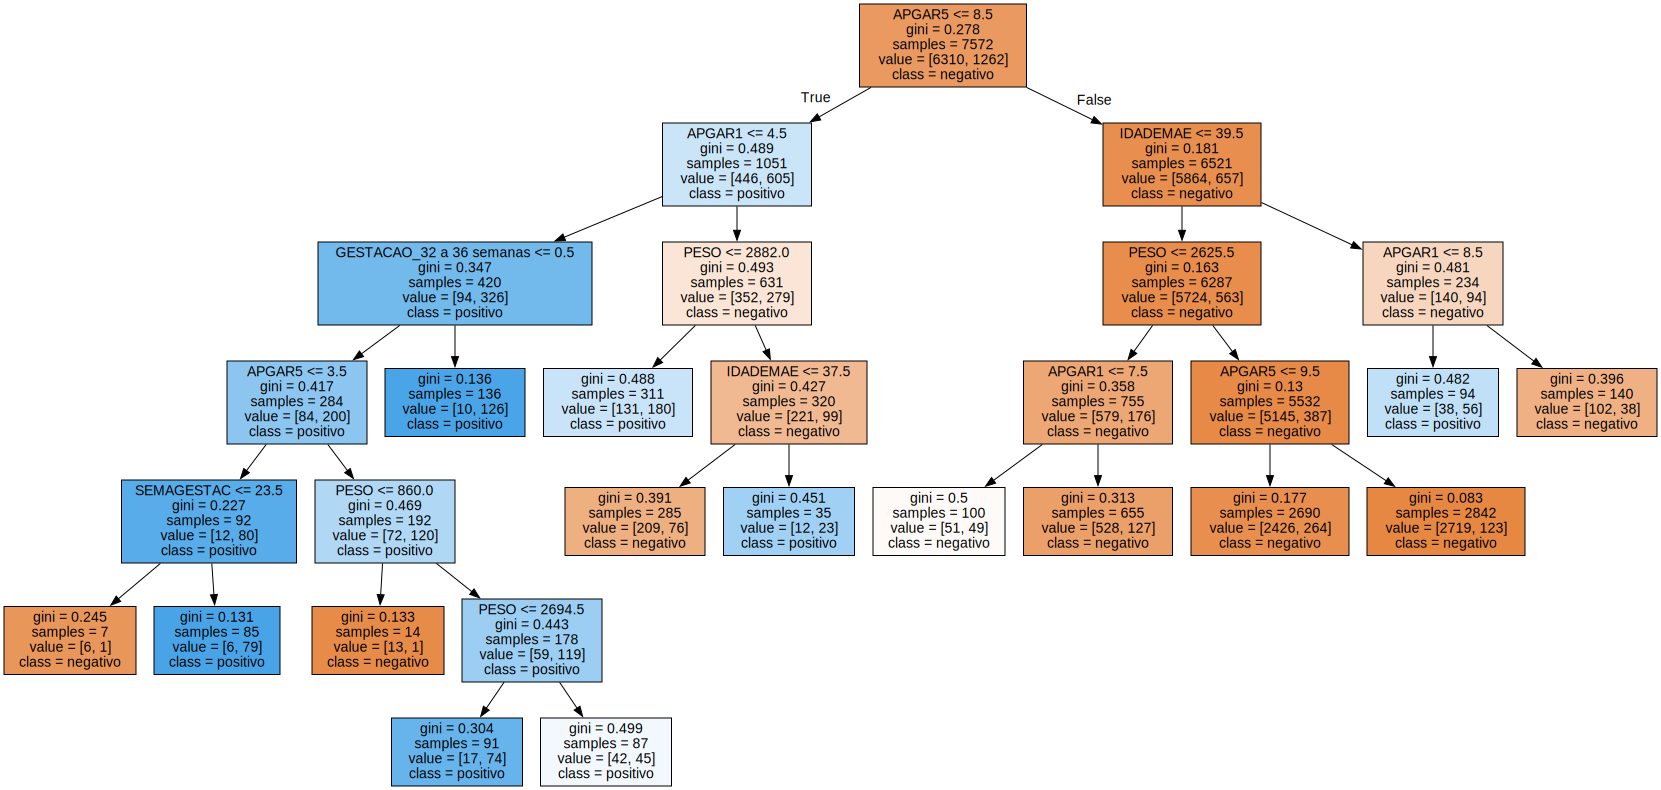

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, ccp_alpha = 0.001).fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(
    tree, 
    out_file="tree.dot", 
    class_names=['negativo', "positivo"],
    feature_names=X.columns, 
    impurity=True, 
    filled=True
)

import graphviz
from pathlib import Path
with open(Path("tree.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.001, random_state=0).fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(
    tree, 
    out_file="tree.dot", 
    class_names=['negativo', "positivo"],
    feature_names=X.columns, 
    impurity=True, 
    filled=True
)

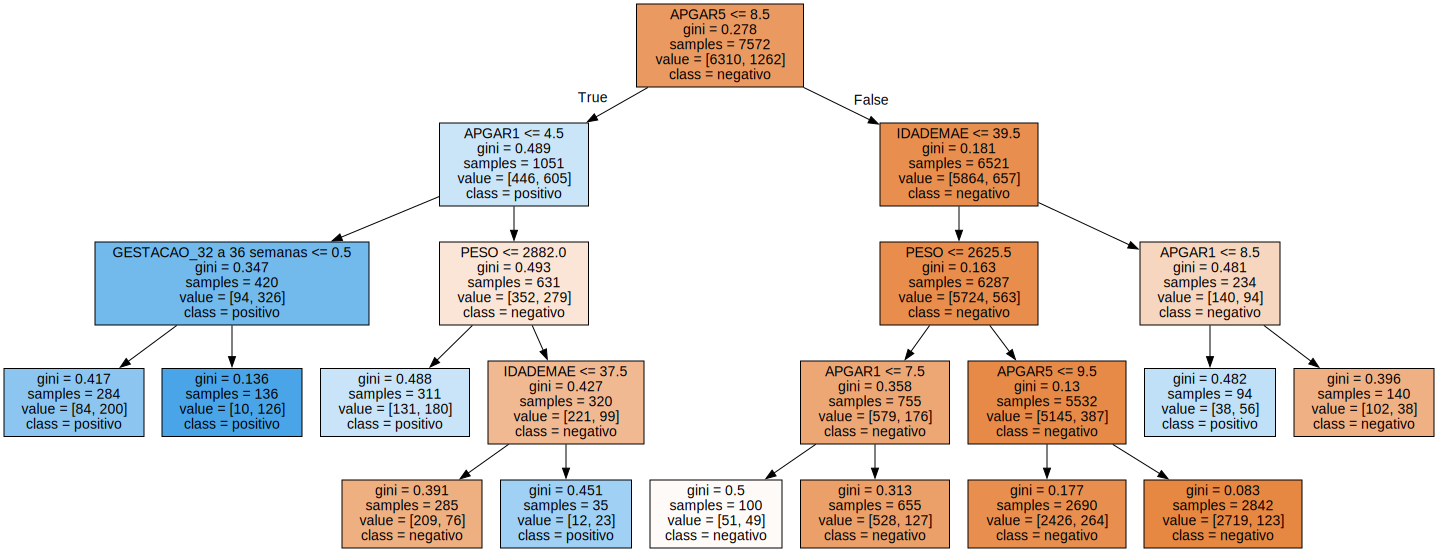

In [7]:
import graphviz
from pathlib import Path
with open(Path("tree.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

tree = DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.001).fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))

              precision    recall  f1-score   support

    negativo       0.89      0.97      0.93      1575
    positivo       0.73      0.38      0.50       318

    accuracy                           0.87      1893
   macro avg       0.81      0.68      0.71      1893
weighted avg       0.86      0.87      0.86      1893



In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# Anotações artesanais de comparativo de performance
# v1: 
#     0.872688853671421

0.872688853671421

In [11]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Anotações artesanais de comparativo de performance
# v1: 
#     0.5010351966873707

0.5010351966873707

In [12]:
y_test.value_counts()

0    1575
1     318
Name: y, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# cols - previsao, rows - valor real
# 44 - false positives
# 197 - false negatives

array([[1531,   44],
       [ 197,  121]])

In [14]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.97206349, 0.02793651],
       [0.61949686, 0.38050314]])

In [15]:
[i for i in df.columns if "GESTACAO" in i]

['GESTACAO_22 a 27 semanas',
 'GESTACAO_28 a 31 semanas',
 'GESTACAO_32 a 36 semanas',
 'GESTACAO_37 a 41 semanas',
 'GESTACAO_42 semanas e mais',
 'GESTACAO_Ignorado',
 'GESTACAO_Menos de 22 semanas']

<AxesSubplot: >

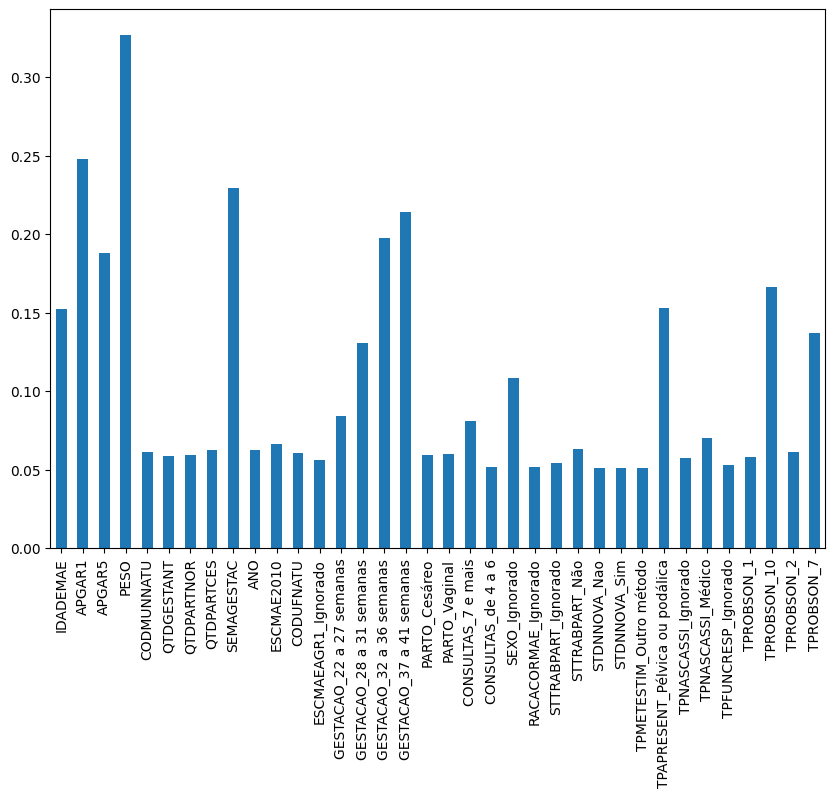

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
df_corr = df.corr()
df_corr = df_corr[(abs(df_corr["y"]) > 0.05) & (abs(df_corr["y"]) < 0.99)]
df_corr["y"].abs().plot(kind = "bar")

In [17]:
(df.CODMUNRES == df.CODMUNNASC).astype(int).value_counts()

1    5169
0    2403
dtype: int64

In [18]:
def feature_creation(df):
    return df.assign(
        equal_CODMUNRES_and_CODMUNNASC = (df.CODMUNRES == df.CODMUNNASC).astype(int),
        equal_CODMUNRES_and_CODMUNNATU = (df.CODMUNRES == df.CODMUNNATU).astype(int),
        equal_CODMUNNASC_and_CODMUNNATU = (df.CODMUNNASC == df.CODMUNNATU).astype(int),
    )

In [19]:
df.shape

(7572, 164)

In [20]:
feature_creation(df).shape

(7572, 164)